In [ ]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Generate random data
n_customers = 500
data = {
    'CustomerID': np.arange(1, n_customers + 1),
    'Age': np.random.randint(18, 65, size=n_customers),
    'AnnualIncome': np.random.randint(30, 120, size=n_customers) * 1000,
    'NumPurchases': np.random.randint(1, 20, size=n_customers),
    'TotalAmountSpent': np.random.uniform(50, 2000, size=n_customers).round(2)
}

# Create DataFrame
customer_data = pd.DataFrame(data)

# Display the first few rows of the generated data
print(customer_data.head())

   CustomerID  Age  AnnualIncome  NumPurchases  TotalAmountSpent
0           1   56         62000            14           1015.54
1           2   46         90000            11            987.14
2           3   32         80000             9           1205.20
3           4   60         72000             2           1658.13
4           5   25         41000            12            728.23



Basic Statistics of the Dataset:
       CustomerID         Age   AnnualIncome  NumPurchases  TotalAmountSpent
count  500.000000  500.000000     500.000000    500.000000        500.000000
mean   250.500000   41.278000   73162.000000      9.874000       1035.614260
std    144.481833   13.389072   26419.305733      5.518608        562.800547
min      1.000000   18.000000   30000.000000      1.000000         59.630000
25%    125.750000   30.000000   50000.000000      5.000000        530.085000
50%    250.500000   42.000000   73500.000000     10.000000       1068.815000
75%    375.250000   52.000000   95000.000000     15.000000       1486.210000
max    500.000000   64.000000  119000.000000     19.000000       1998.860000


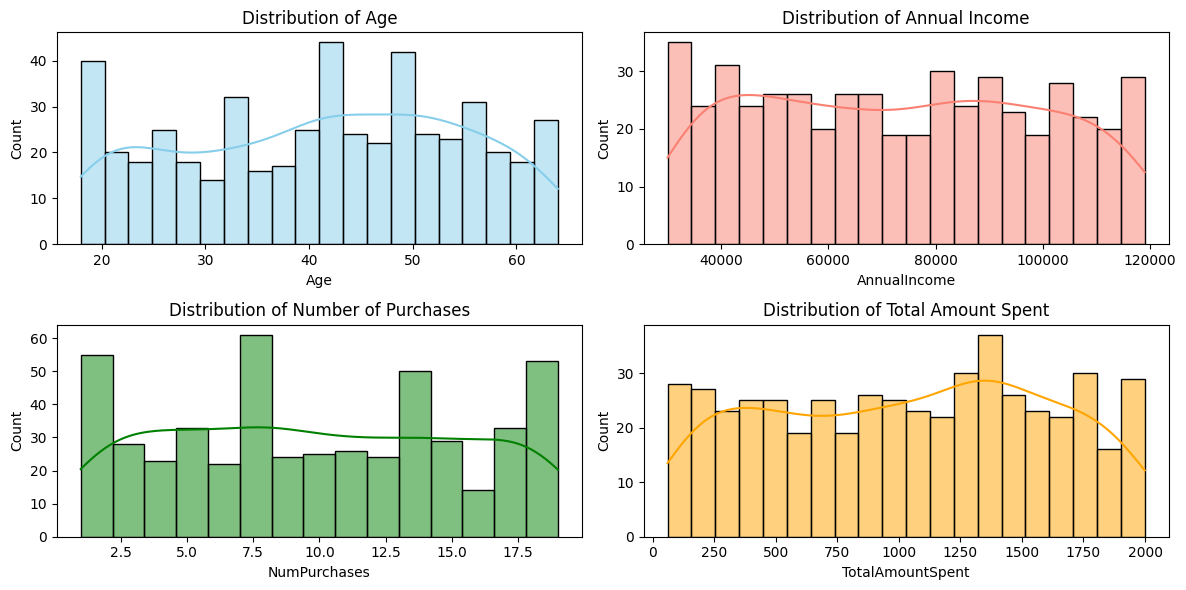

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable h

<Figure size 1200x600 with 0 Axes>

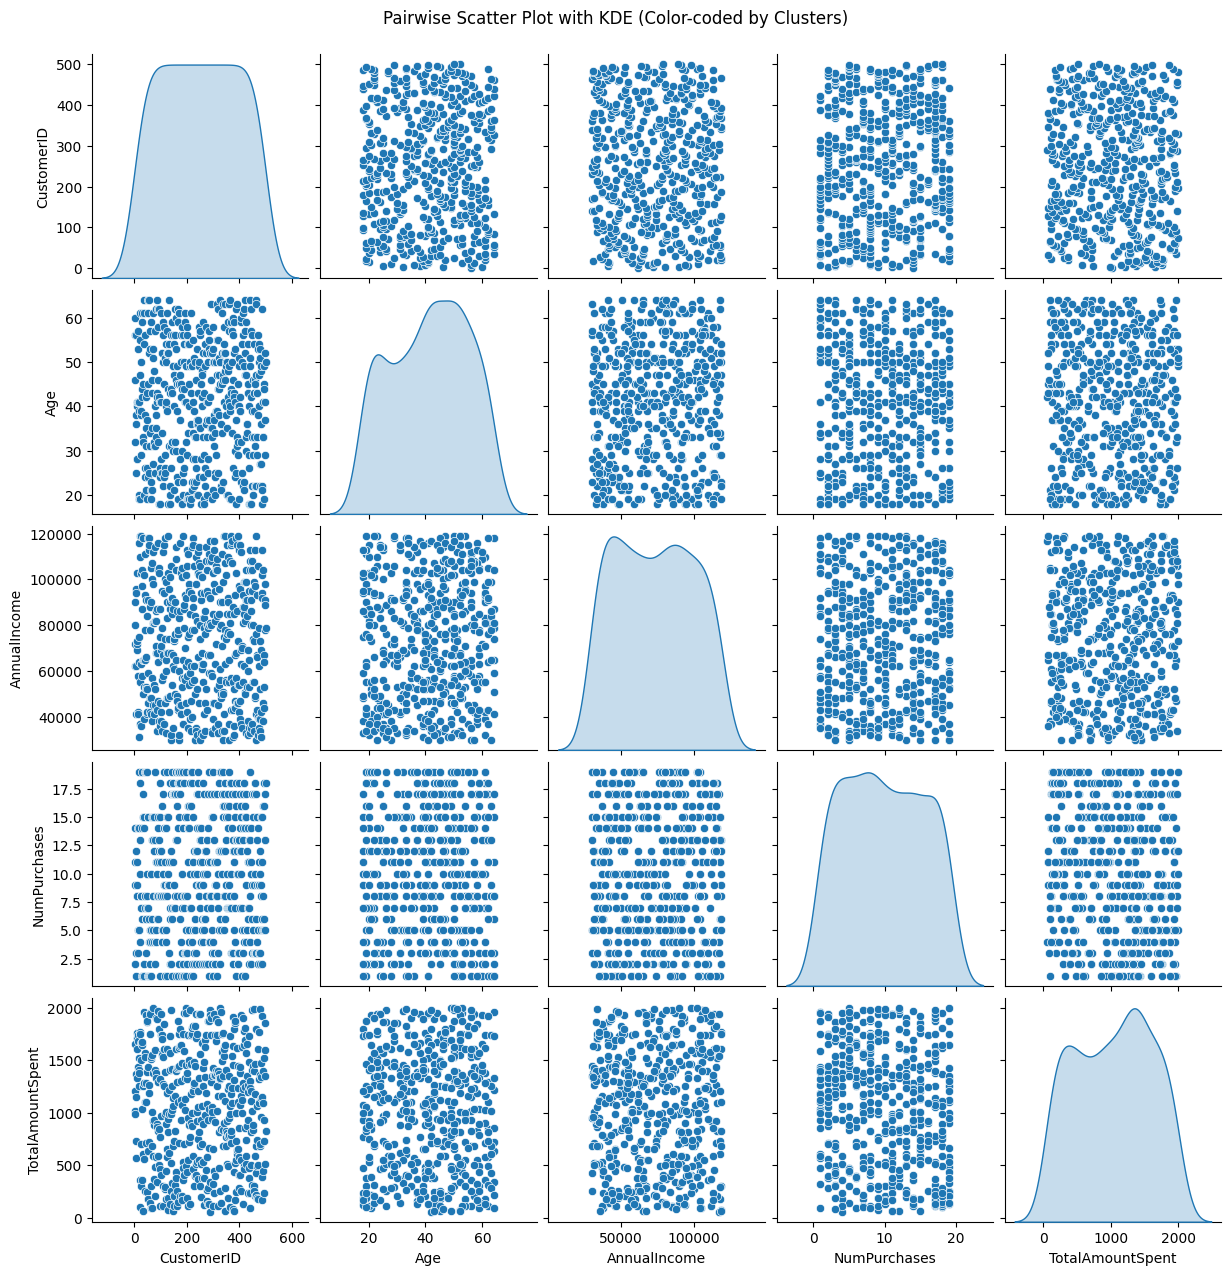

In [ ]:
# Step 1: Data Exploration

# Display basic statistics
print("\nBasic Statistics of the Dataset:")
print(customer_data.describe())

# Visualize distributions and relationships
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(customer_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')

# Distribution of Annual Income
plt.subplot(2, 2, 2)
sns.histplot(customer_data['AnnualIncome'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Annual Income')

# Distribution of Number of Purchases
plt.subplot(2, 2, 3)
sns.histplot(customer_data['NumPurchases'], bins=15, kde=True, color='green')
plt.title('Distribution of Number of Purchases')

# Distribution of Total Amount Spent
plt.subplot(2, 2, 4)
sns.histplot(customer_data['TotalAmountSpent'], bins=20, kde=True, color='orange')
plt.title('Distribution of Total Amount Spent')

plt.tight_layout()
plt.show()

# Relationship between variables
plt.figure(figsize=(12, 6))

# Pairwise scatter plot with color-coded clusters
sns.pairplot(customer_data, diag_kind='kde', palette='viridis')
plt.suptitle('Pairwise Scatter Plot with KDE (Color-coded by Clusters)', y=1.02)

plt.show()


In [ ]:
# Step 2: Data Preprocessing

# Check for missing values
print("\nMissing Values:")
print(customer_data.isnull().sum())

# No missing values are expected in our randomly generated data.

# Standardize or normalize relevant columns (optional for K-means)
from sklearn.preprocessing import StandardScaler

# Select columns for standardization
columns_to_standardize = ['Age', 'AnnualIncome', 'NumPurchases', 'TotalAmountSpent']

# Standardize selected columns
scaler = StandardScaler()
customer_data[columns_to_standardize] = scaler.fit_transform(customer_data[columns_to_standardize])

# Display the first few rows after standardization
print("\nFirst few rows after standardization:")
print(customer_data.head())



Missing Values:
CustomerID          0
Age                 0
AnnualIncome        0
NumPurchases        0
TotalAmountSpent    0
dtype: int64

First few rows after standardization:
   CustomerID       Age  AnnualIncome  NumPurchases  TotalAmountSpent
0           1  1.100655     -0.422917      0.748401         -0.035704
1           2  0.353029      0.637975      0.204241         -0.086217
2           3 -0.693647      0.259085     -0.158532          0.301627
3           4  1.399705     -0.044027     -1.428238          1.107211
4           5 -1.216985     -1.218587      0.385628         -0.546716


In [ ]:
# Step 3: Customer Segmentation

from sklearn.cluster import KMeans

# Select features for clustering
features_for_clustering = ['Age', 'AnnualIncome', 'NumPurchases', 'TotalAmountSpent']

# Specify the number of clusters (you can adjust this based on your analysis)
n_clusters = 4

# Fit K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[features_for_clustering])

# Display the first few rows with the assigned clusters
print("\nFirst few rows with assigned clusters:")
print(customer_data[['CustomerID', 'Age', 'AnnualIncome', 'NumPurchases', 'TotalAmountSpent', 'Cluster']].head())



First few rows with assigned clusters:
   CustomerID       Age  AnnualIncome  NumPurchases  TotalAmountSpent  Cluster
0           1  1.100655     -0.422917      0.748401         -0.035704        1
1           2  0.353029      0.637975      0.204241         -0.086217        1
2           3 -0.693647      0.259085     -0.158532          0.301627        3
3           4  1.399705     -0.044027     -1.428238          1.107211        2
4           5 -1.216985     -1.218587      0.385628         -0.546716        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster Analysis - Mean Values:
   Cluster  CustomerID       Age  AnnualIncome  NumPurchases  TotalAmountSpent
0        0  241.452991 -1.025925     -0.547595      0.007352         -0.591297
1        1  247.879433  0.676470      0.395593      0.615899         -0.785441
2        2  259.007752  0.490383     -0.808856     -0.528336          0.656400
3        3  253.424779 -0.341668      0.996747     -0.172979          0.842950


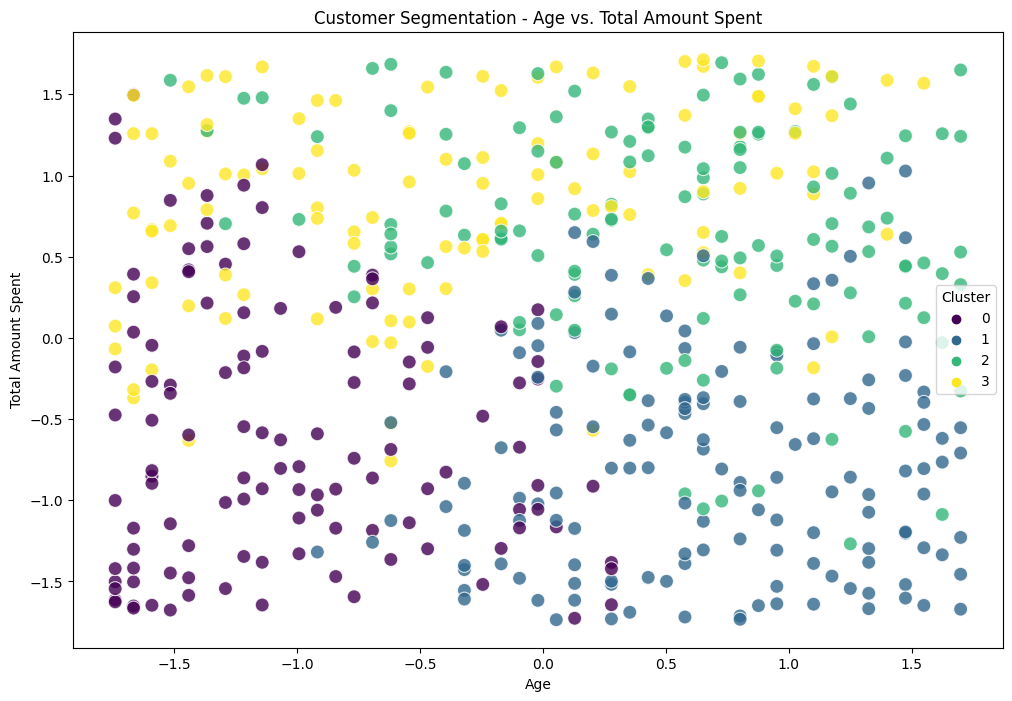

In [ ]:
# Step 5: Insights and Recommendations

# Cluster Analysis: Analyze the characteristics of each cluster
cluster_analysis = customer_data.groupby('Cluster').mean().reset_index()

# Display the cluster analysis
print("\nCluster Analysis - Mean Values:")
print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(12, 8))

# Scatter plot for Age vs. Total Amount Spent, color-coded by clusters
sns.scatterplot(x='Age', y='TotalAmountSpent', hue='Cluster', data=customer_data, palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segmentation - Age vs. Total Amount Spent')
plt.xlabel('Age')
plt.ylabel('Total Amount Spent')
plt.legend(title='Cluster')

plt.show()


<Figure size 1200x600 with 0 Axes>

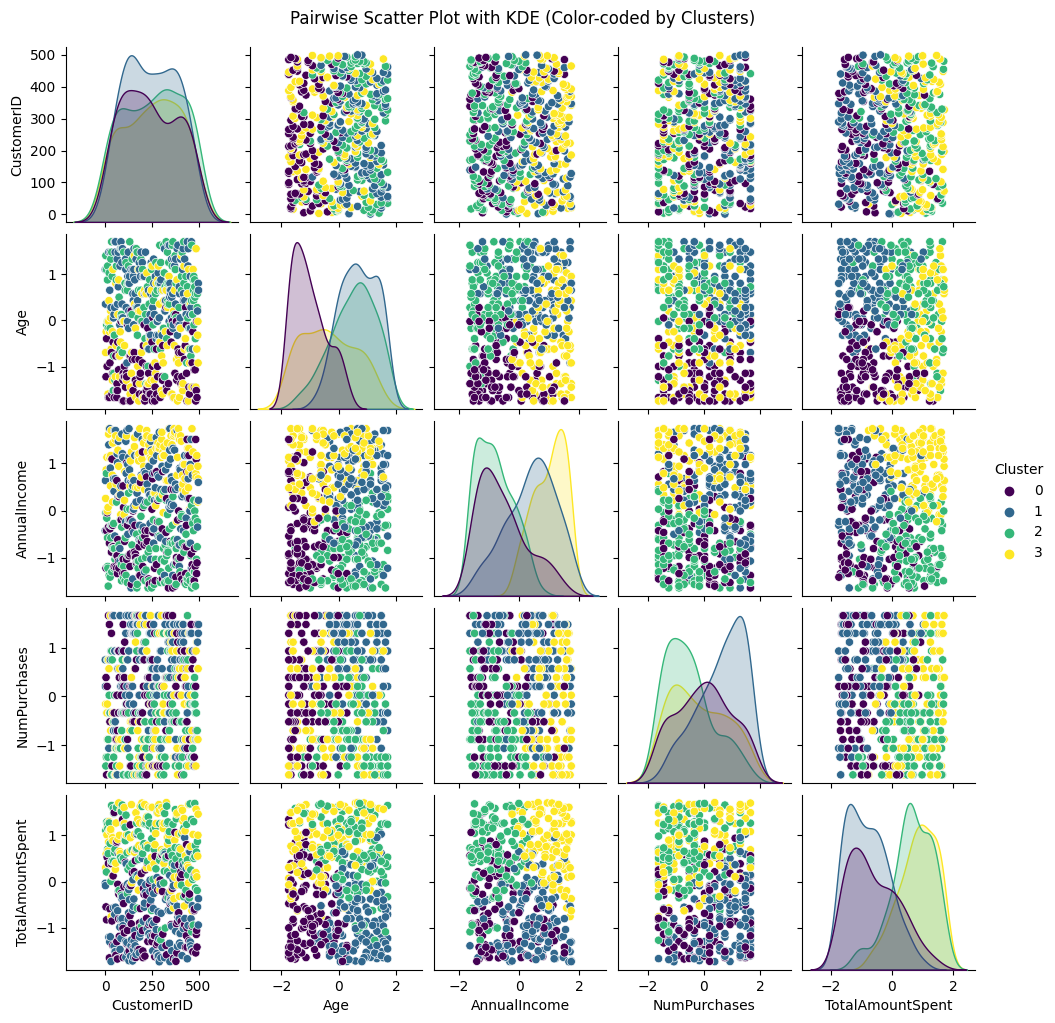

In [ ]:
# Step 6: Visualization

# Visualize the clusters using pair plots
plt.figure(figsize=(12, 6))

# Pairwise scatter plot with color-coded clusters
sns.pairplot(customer_data, hue='Cluster', diag_kind='kde', palette='viridis', height=2)
plt.suptitle('Pairwise Scatter Plot with KDE (Color-coded by Clusters)', y=1.02)

plt.show()


In [ ]:
# Step 7: Documentation

# Summarize key findings and recommendations
summary = """
### Customer Segmentation and Analysis

**Key Findings:**
- Four distinct customer clusters have been identified based on age, annual income, number of purchases, and total amount spent.
- Cluster analysis reveals varying characteristics among the identified segments.

**Cluster Analysis - Mean Values:**
{}
""".format(cluster_analysis)

# Save summary to a text file (optional)
with open('customer_segmentation_summary.txt', 'w') as file:
    file.write(summary)

print(summary)



### Customer Segmentation and Analysis

**Key Findings:**
- Four distinct customer clusters have been identified based on age, annual income, number of purchases, and total amount spent.
- Cluster analysis reveals varying characteristics among the identified segments.

**Cluster Analysis - Mean Values:**
   Cluster  CustomerID       Age  AnnualIncome  NumPurchases  TotalAmountSpent
0        0  241.452991 -1.025925     -0.547595      0.007352         -0.591297
1        1  247.879433  0.676470      0.395593      0.615899         -0.785441
2        2  259.007752  0.490383     -0.808856     -0.528336          0.656400
3        3  253.424779 -0.341668      0.996747     -0.172979          0.842950

